In [112]:
import numpy as np
import matplotlib.pyplot as plt

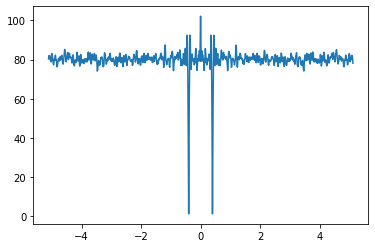

In [113]:
# HW4-1

def F2(t, A, B, C, D):
  return A * (t ** B) + C * np.cos(D * t) + np.random.normal(0, 1, t.shape)

def gene2coef(gene):
  A = 0.6
  B = 1.2
  C = 100
  D = (np.sum(2 ** np.arange(10) * gene) - 511)/100
  return A, B, C, D

T = np.random.random((1000, 1)) * 100
b2 = F2(T, 0.6, 1.2, 100, 0.4)

A = 0.6
B = 1.2
C = 100
D = np.arange(-5.11, 5.13, 0.01).reshape(-1, 1)
fit = []
for i in range(len(D)):
    fit.append(np.mean(abs(F2(T, A, B, C, D[i]) - b2)))
plt.plot(D, fit)

/var/folders/cq/9hy56n4d2ksfr6vt4mc93l3c0000gn/T/ipykernel_30529/1785163527.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


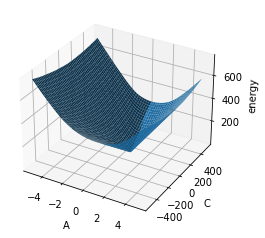

In [114]:
# HW4-2

fig = plt.figure()
ax = fig.gca(projection='3d')

T = np.random.random((1000, 1)) * 100
b2 = F2(T, 0.6, 1.2, 100, 0.4)
A = np.arange(-5.11, 5.13, 0.01)
B = 1.2
C = np.arange(-511.0, 513.0, 1.0)
D = 0.4
fit = np.zeros((len(A), len(C)))

for i in range(len(C)):
    for j in range(len(A)):
        fit[i][j] = np.mean(abs(F2(T, A[j], B, C[i], D) - b2))

AA, CC = np.meshgrid(A, C)
ax.plot_surface(AA, CC, fit)
ax.set_xlabel('A')
ax.set_ylabel('C')
ax.set_zlabel('energy')
plt.show()

/Users/skylining/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:2407: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/var/folders/cq/9hy56n4d2ksfr6vt4mc93l3c0000gn/T/ipykernel_30529/2329939305.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(AList,bList)[0]


1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
738 0.73 5.71 11.3


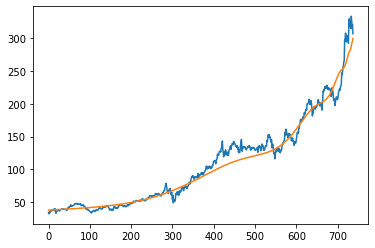

In [115]:
# HW4-3

def Fitness(A, B, C, tc, beta, omega, phi, T):
  L = list()
  for t in T:
        L.append(A + B * (tc - t) ** beta + C * (tc - t) ** beta * np.cos(omega * np.log(tc - t) + phi))
  return np.array(L)

def gene2coef(gene):
  tc = np.sum(2 ** np.arange(3)) + 731
  beta = (np.sum(2 ** np.arange(10) * gene[3:13]))/1000
  omega = (np.sum(2 ** np.arange(10) * gene[13:23]))/100
  phi = (np.sum(2 ** np.arange(7) * gene[23:30]))/10
  return tc, beta, omega, phi

def getABC(tc, beta, omega, phi):
    T = np.array([i for i in range(tc)])
    bList = np.array([[np.log(data[i])] for i in range(len(T))])
    AList = []
    for t in T:
        AList.append([1, (tc-t)**beta, (tc-t)**beta * np.cos(omega * np.log(731+tc-t) + phi)])
    AList = np.array(AList)
    x = np.linalg.lstsq(AList,bList)[0]
    return T, x[0], x[1], x[2]

data = np.recfromcsv('NVDA.csv', skip_header= 0)
data = data['close']
X = [i for i in range(len(data))]
Y = []


N = 1000
G = 10
survive_rate = 0.05
mutation_rate = 0.001
survive = round(N * survive_rate)
mutation =  round(N * 30 * mutation_rate)
 
pop = np.random.randint(0, 2, (N, 30))
fit = np.zeros((N, 1))


for generation in range(G):
  print(f'{generation + 1} / {G}')
  for n in range(N):   
    tc, beta, omega, phi = gene2coef(pop[n,:])
    T, A, B, C = getABC(tc, beta, omega, phi)
    fit[n] = np.mean(abs(Fitness(A, B, C, tc, beta, omega, phi, T) - bList)) #smaller is better
  #selection
  sortf = np.argsort(fit[:,0]) 
  pop = pop[sortf, :] 
  for i in range(survive, N):
    fid = np.random.randint(0, survive)
    mid = np.random.randint(0, survive)
    while(fid==mid):
      mid = np.random.randint(0, survive)
    mask = np.random.randint(0, 2, [1, 30])
    son = pop[mid,:].copy()
    father = pop[fid,:].copy()
    son[mask[0,:]==1] = father[mask[0,:]==1]
    pop[i, :] = son
  for i in range(mutation):
    m = np.random.randint(survive, N)
    n = np.random.randint(0, 30)
    pop[m, n] = 1 - pop[m, n]

for n in range(N):   
    tc, beta, omega, phi = gene2coef(pop[n,:])
    T, A, B, C = getABC(tc, beta, omega, phi)
    fit[n] = np.mean(abs(Fitness(A, B, C, tc, beta, omega, phi, T) - bList)) #smaller is better
sortf = np.argsort(fit[:,0]) 
pop = pop[sortf, :] 
tc, beta, omega, phi = gene2coef(pop[0,:])
T, A, B, C = getABC(tc, beta, omega, phi)
print(tc, beta, omega, phi)
             
plt.plot(T, data[:tc])
plt.plot(T, np.exp(Fitness(A, B, C, tc, beta, omega, phi, T)))